# Clustring Project - KMeans

In [1]:
# Import Libraries

# Warnings
import warnings
warnings.simplefilter(action='ignore')


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import IsolationForest


In [2]:
# Import Data and converting them to dataframe

Data= pd.read_csv('D:\Scientific Topics\AI\IMT1.ir_Machine Learning\Data\Customer_Data_Cluster.csv')
df = pd.DataFrame(Data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
# Getting general information

df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Checking if there is null data in dataset

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Preprocessing

In [6]:
# Fill and drop some missing values

# Detect the row which have the null number in CREDIT_LIMIT column:

df[df['CREDIT_LIMIT'].isnull()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [7]:
# Delete the null row of column CREDIT_LIMIT:

DF = df.drop(index = 5203) # inplace = True

In [8]:
# Reset the index after dropping NaN value:

DF = DF.reset_index(drop=True)

In [9]:
# Show the equvalent numbers of two columns

DF[['PAYMENTS', 'MINIMUM_PAYMENTS']][DF['MINIMUM_PAYMENTS'].isnull()]

PAYMENTS  MINIMUM_PAYMENTS
3       0.000000               NaN
45      0.000000               NaN
47      0.000000               NaN
54    417.016763               NaN
55      0.000000               NaN
...          ...               ...
8918    0.000000               NaN
8928    0.000000               NaN
8934    0.000000               NaN
8943    0.000000               NaN
8945  275.861322               NaN

[313 rows x 2 columns]

#### Payment and Minimumpayments are related, so replacing the null Minimumpayments data using Payment data is logical.
#### Here, the selected numbers for the null data which their equvalent number in payment column is 0, are 0. And for the other ones are the mean of the payments column.

In [10]:
minpayments = DF['MINIMUM_PAYMENTS'].copy() 

index = 0

# zip allows you to iterate two lists at the same time.
# The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
# zip is used to merge 2 lists together. It returns the first element of each list, then 2nd element of each list, etc. 

for i, j in zip(DF['PAYMENTS'], DF['MINIMUM_PAYMENTS'].isna()): 
    if (i == 0) and (j == True):
        minpayments[index] = 0
    elif (i != 0) and (j == True): 
        minpayments[index] = np.mean(DF["PAYMENTS"])
    index += 1                    

In [11]:
# Geting a copy

DF['MINIMUM_PAYMENTS'] = minpayments.copy()

In [12]:
# Checking the null data after filling

DF.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Dropping the ID columns, cause we don't need it!

DF.drop(columns='CUST_ID' , axis=1 , inplace=True)

In [14]:
# sns.pairplot(DF);

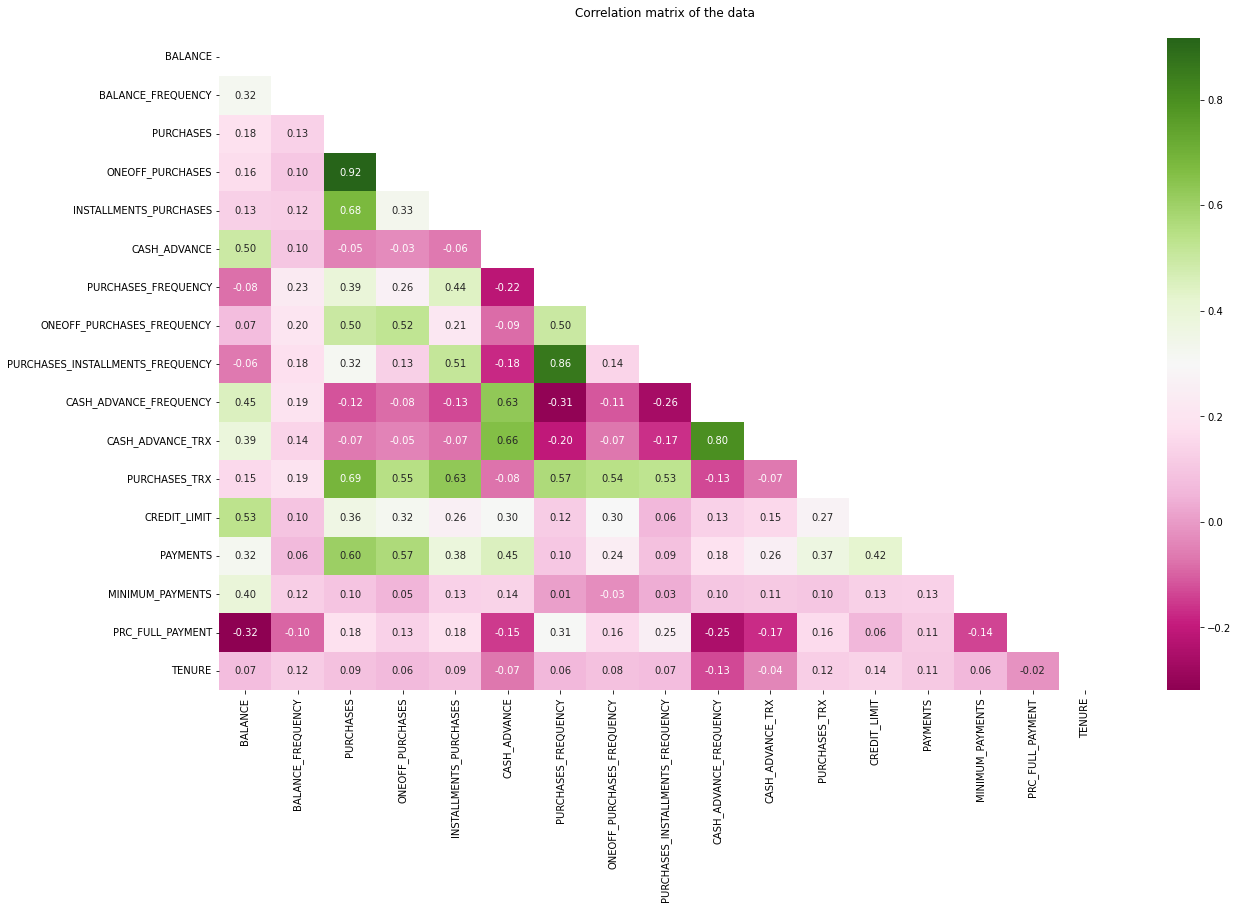

In [15]:
# Correlation Matrix

plt.figure(figsize = (20,12))
mask = np.triu(DF.corr()) # np.ones_like(df1.corr()) # u means upper
hm = sns.heatmap(DF.corr(), cmap= 'PiYG',annot = True , fmt='.2f', mask=mask) 
hm.set(title = "Correlation matrix of the data\n")
plt.show()

In [16]:
# Display the name of columns
DF.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

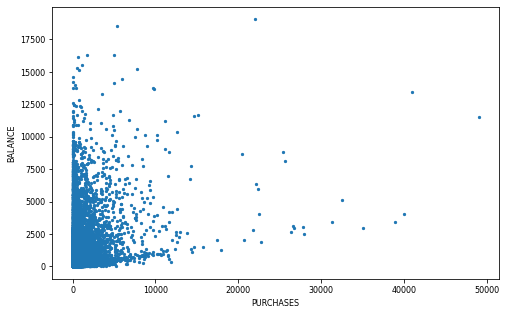

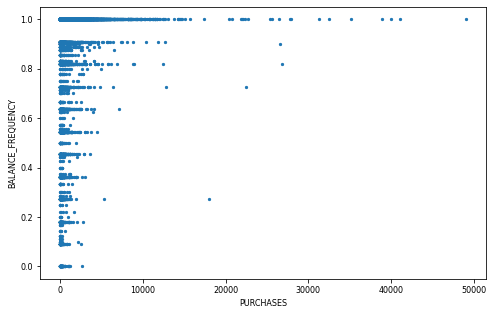

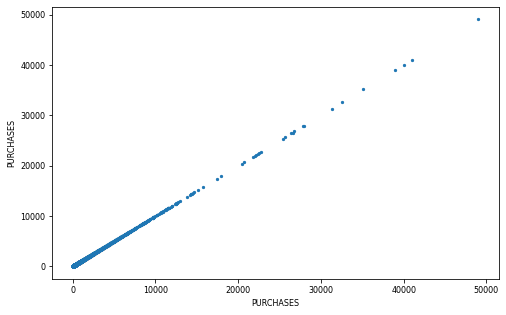

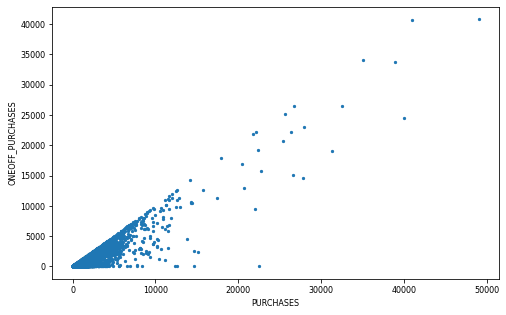

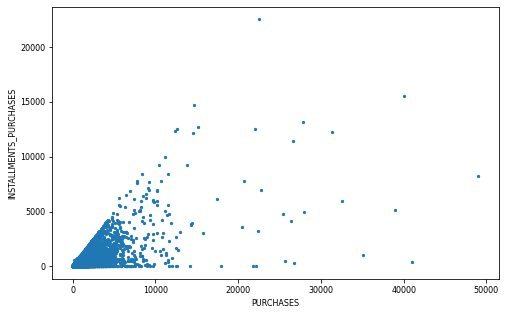

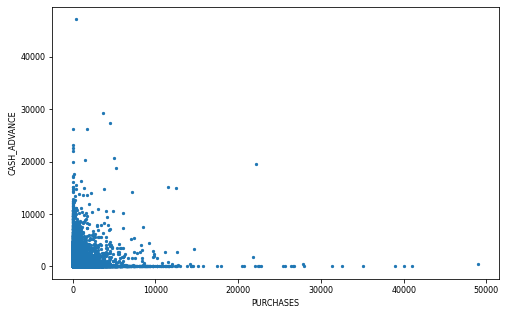

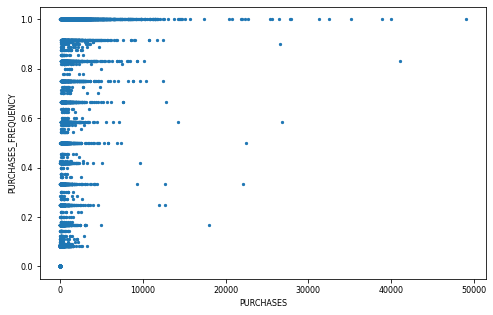

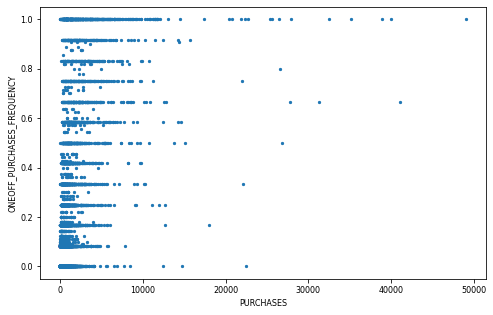

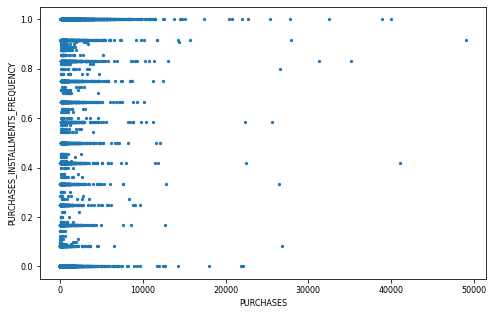

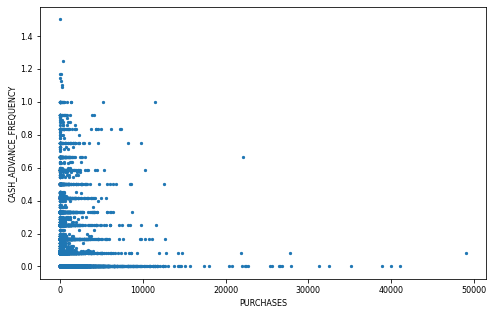

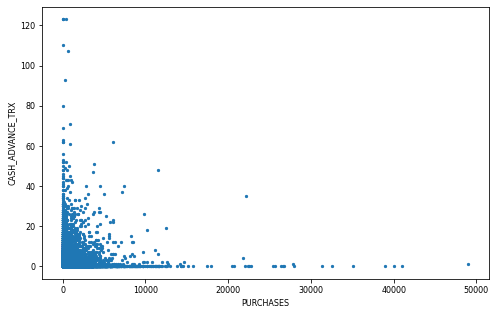

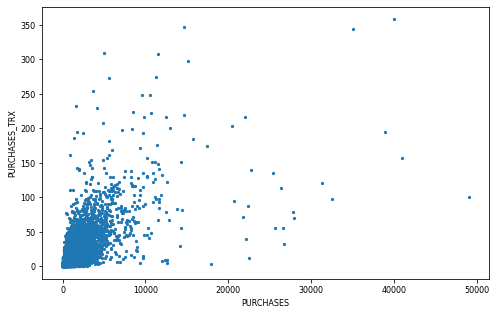

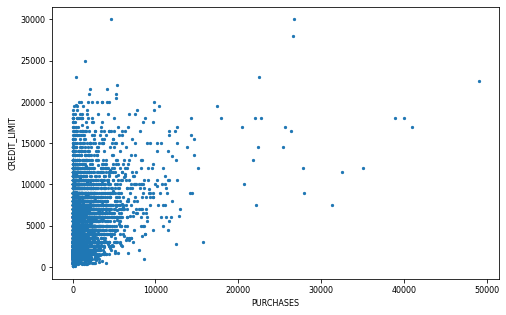

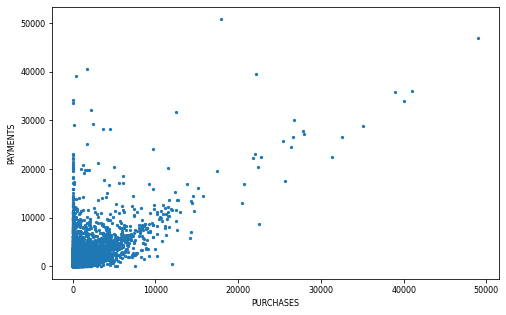

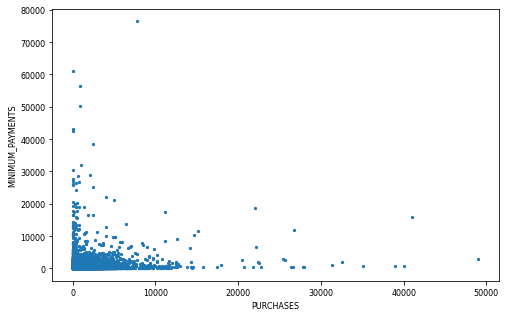

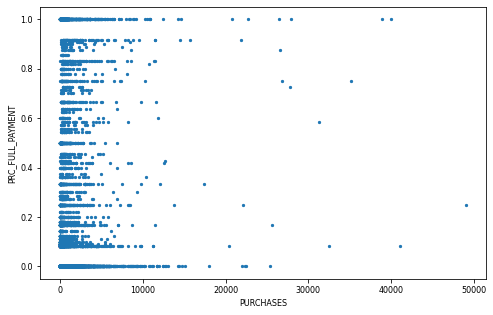

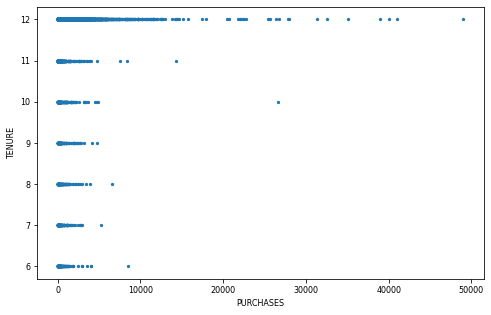

In [17]:
# Two by two comparison of columns, selected feature: Purchases

for i in DF.columns:
    figure = plt.figure(figsize =(8, 5))
    plt.scatter(x = DF["PURCHASES"], y = DF[i], s = 5)
    plt.xlabel("PURCHASES", fontsize = 8)
    plt.ylabel(i, fontsize = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.show()

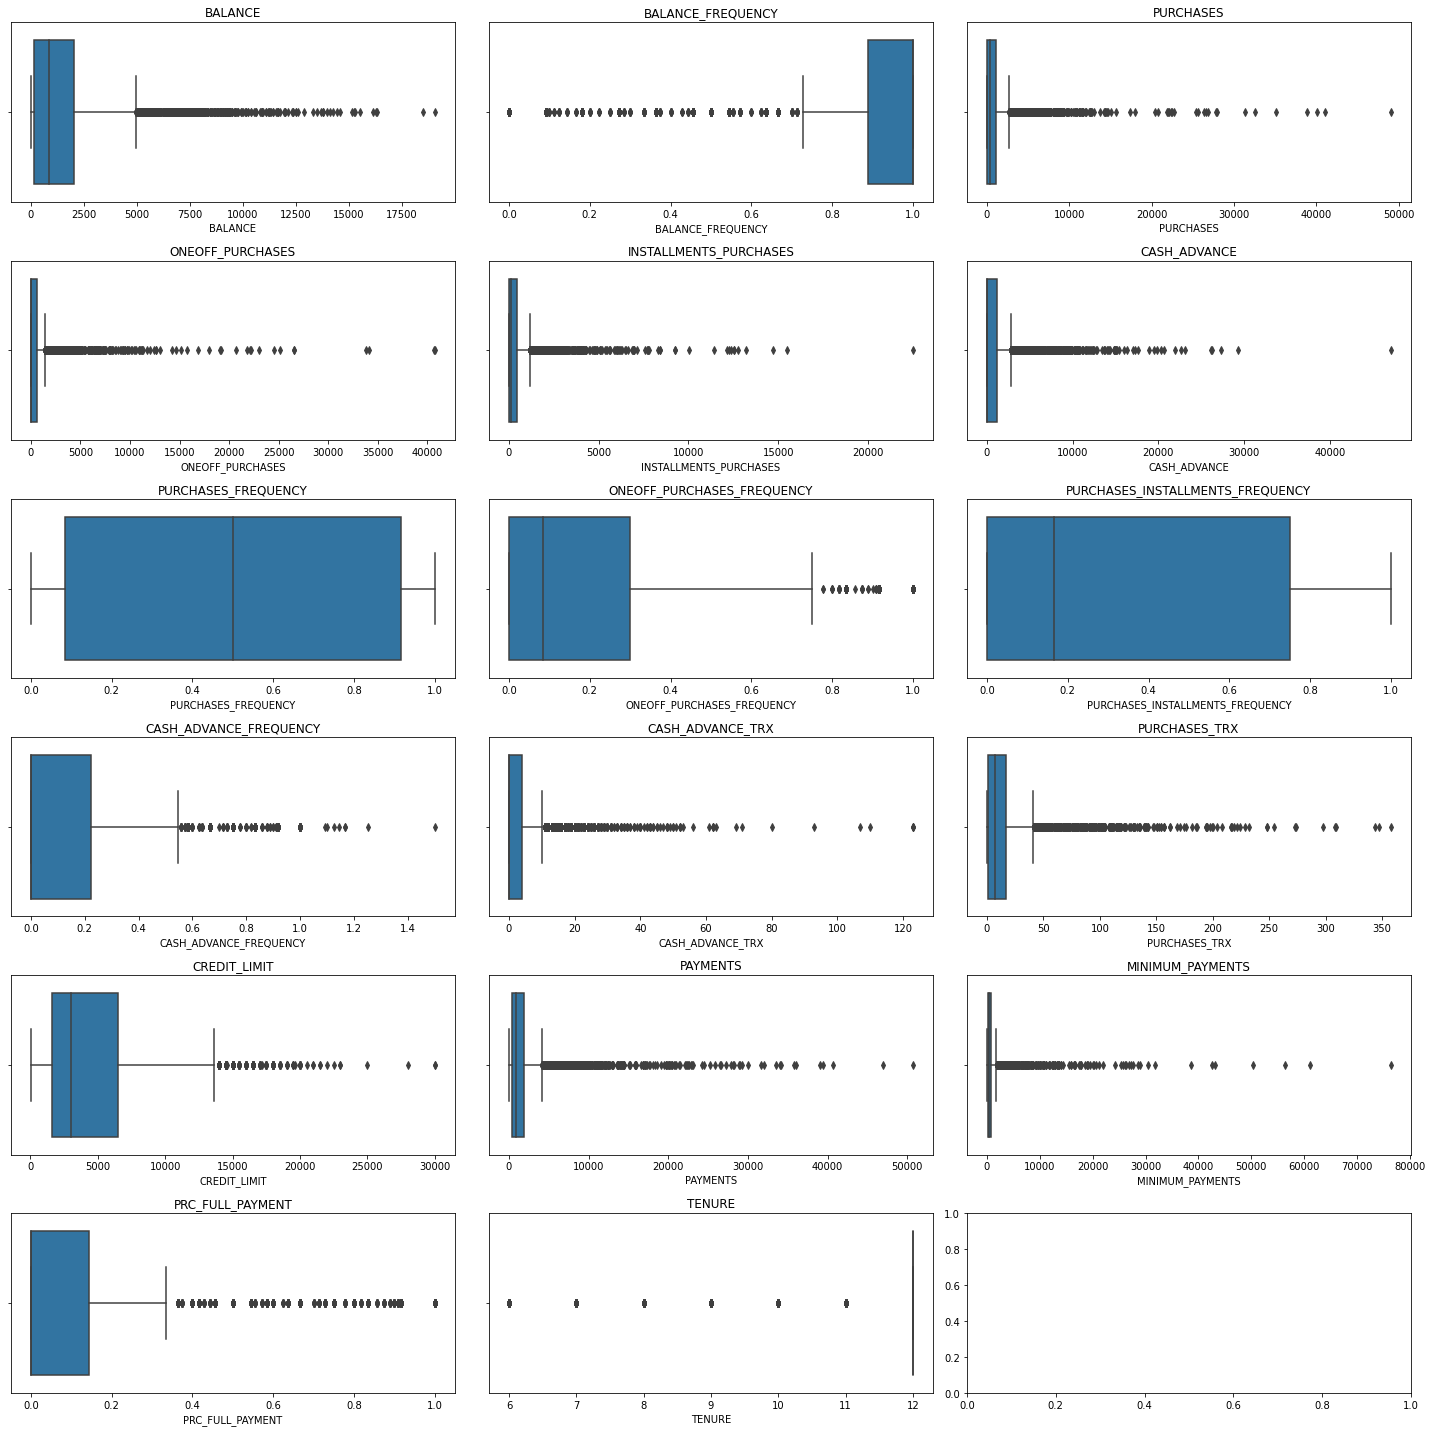

In [18]:
# Boxplot of dataset

fig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(DF.columns)):
    plt.subplot(6,3,i+1)
    ax = sns.boxplot(DF[DF.columns[i]])
    plt.title(DF.columns[i])
    plt.tight_layout()

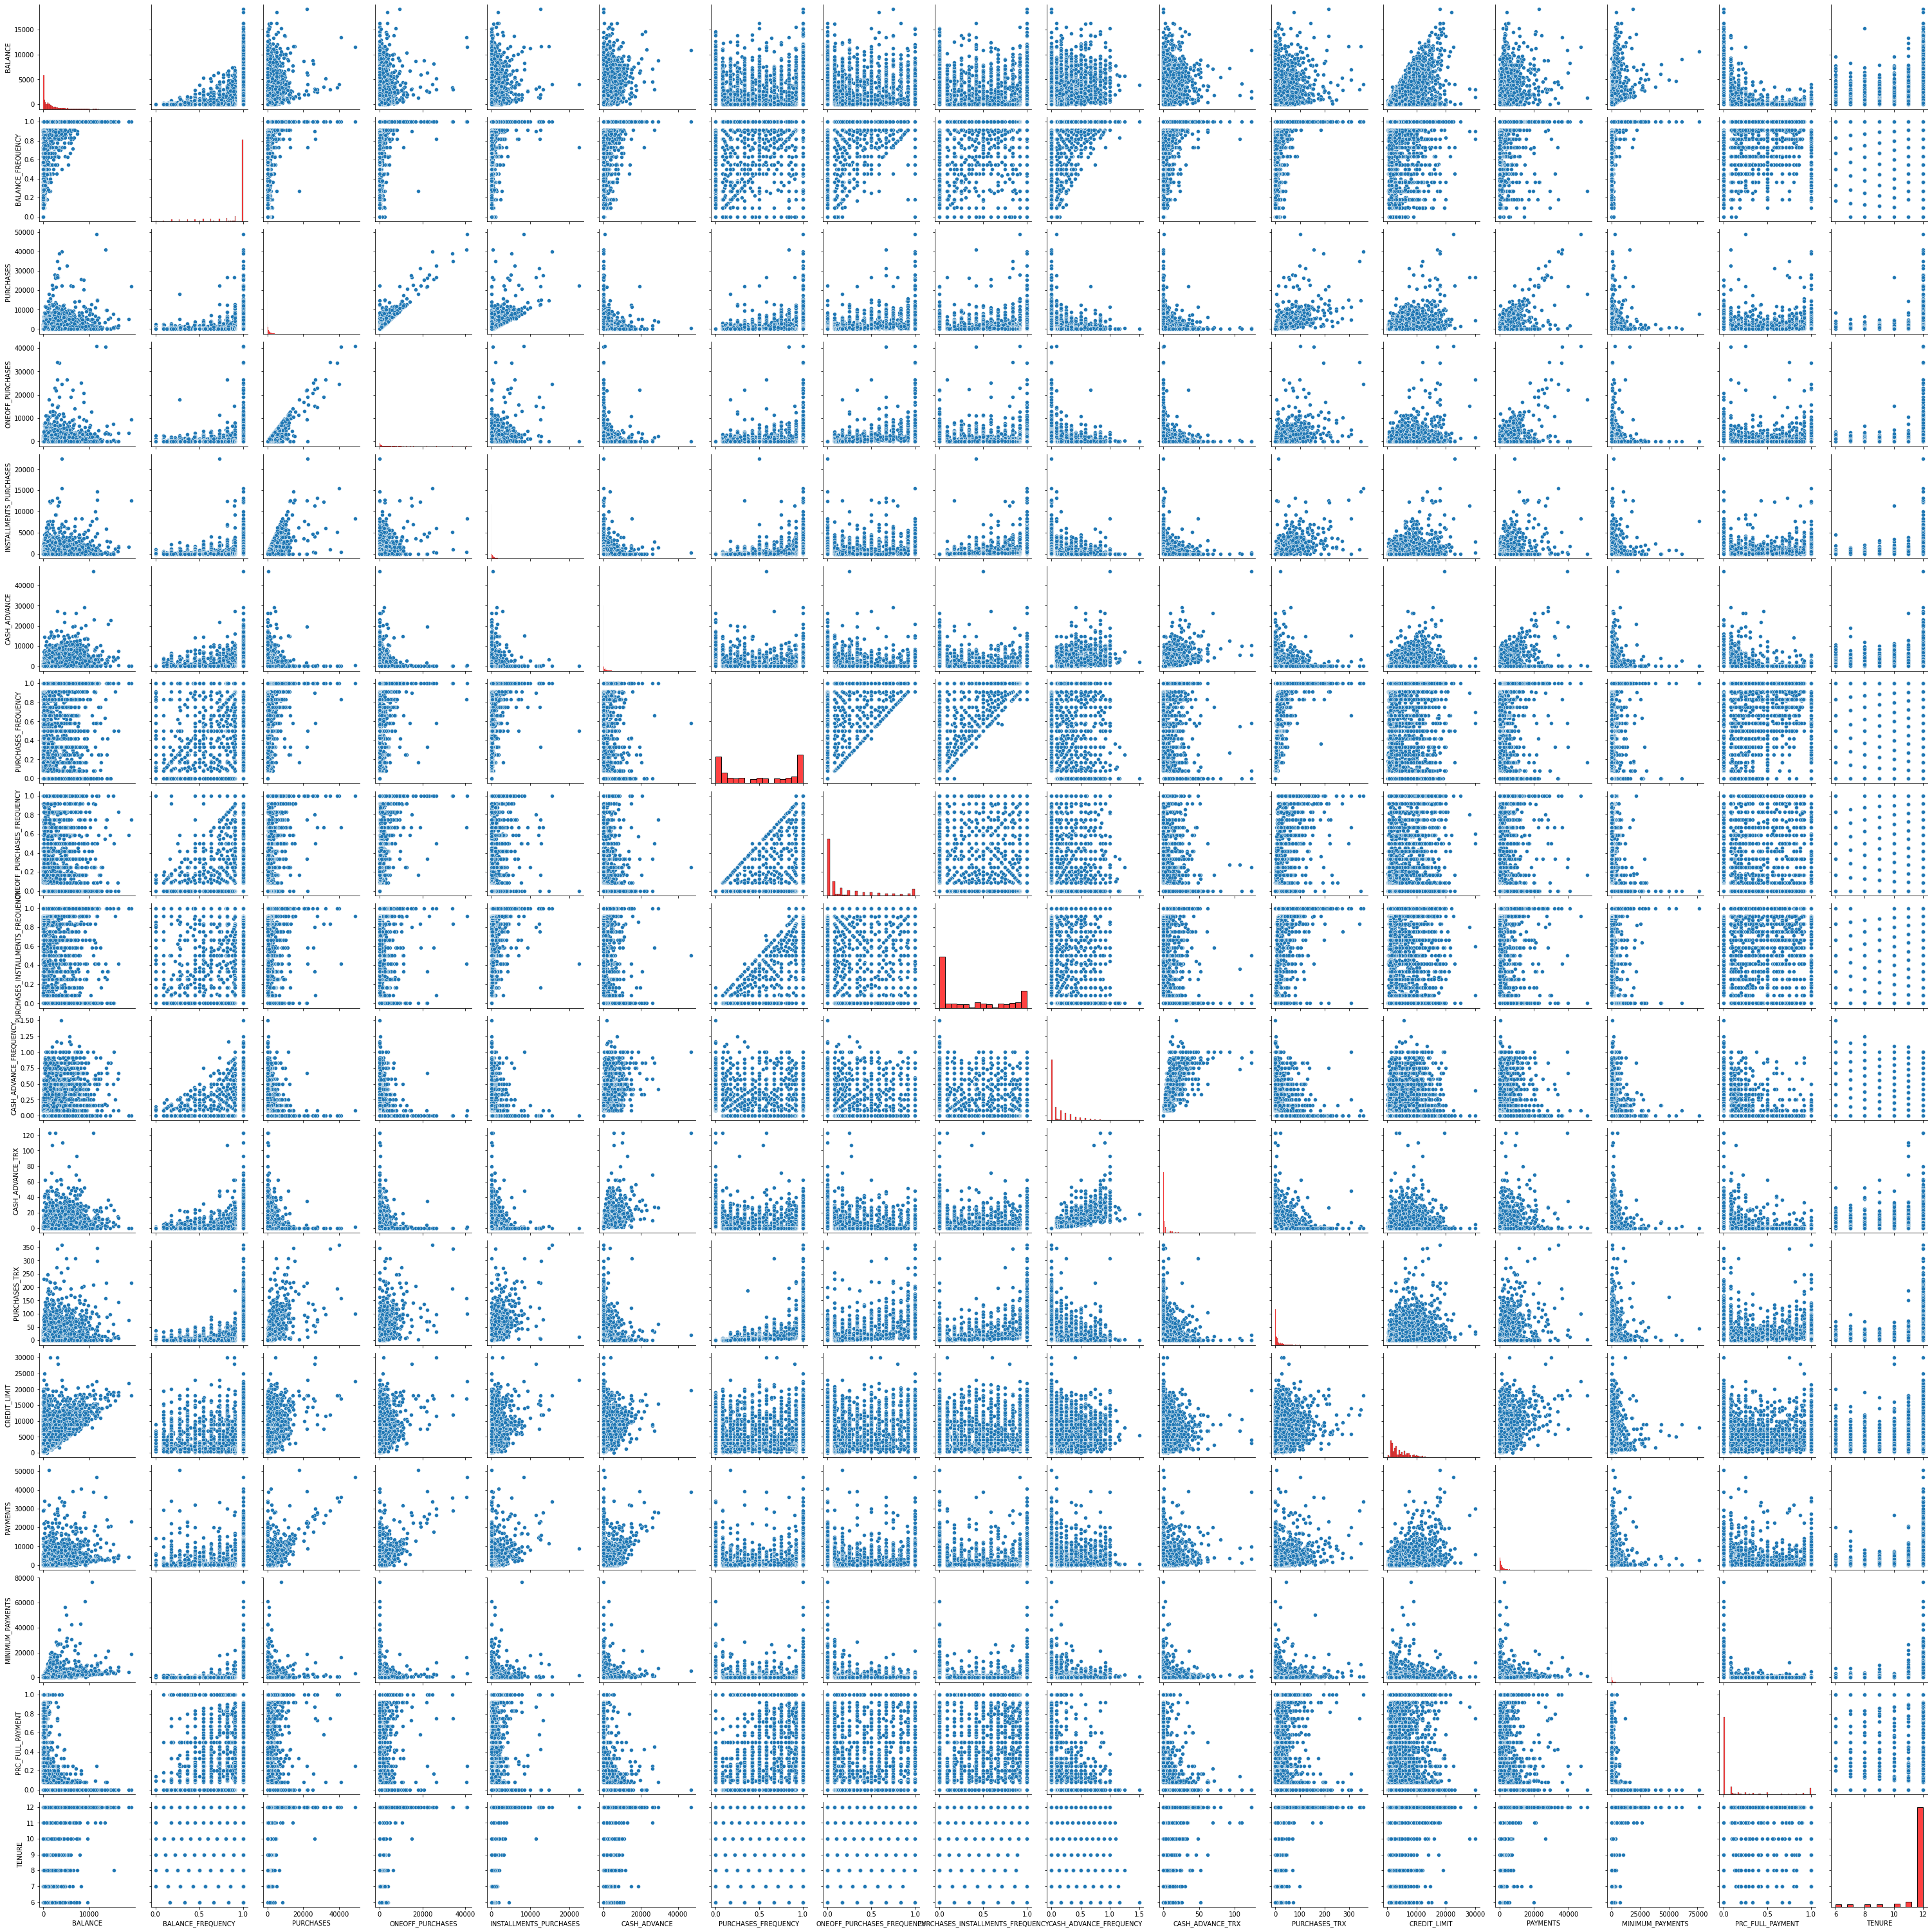

In [19]:
sns.pairplot(DF, diag_kws={'color':'red'})

#### According to the boxplots and pairplot, it is obvious that the data has skewness and it indicates that there are outliers in the data.
#### We use the isolation forest method to detect outliers because the dataset has many features.

## Detecting outliers using Isolation Forest method

In [20]:
IF = IsolationForest(n_estimators = 100, max_samples='auto', contamination= float(0.08), max_features = 1) #DF.shape[1]
preds = IF.fit_predict(DF)
preds

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
DF['outlier'] = preds

In [22]:
DF['outlier'].value_counts()

 1    8233
-1     716
Name: outlier, dtype: int64

In [23]:
DF1 = DF.copy()

In [24]:
outliers = DF1[DF1['outlier']==-1]
outliers_index = outliers.index
len(outliers_index)

716

In [25]:
DF1 = DF1.drop(outliers_index, axis = 0).reset_index(drop=True)

In [26]:
DF1.shape

(8233, 18)

In [27]:
DF1.drop(columns='outlier' , axis=1 , inplace=True)

# Modelling

In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(DF1)

#### Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

In [29]:
kmeans = KMeans(
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42
   )

##### The next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on our data with a maximum of 300 iterations per run:

In [30]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

##### Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [31]:
# The lowest SSE value
print(kmeans.inertia_, '\n')

# Final locations of the centroid
print(kmeans.cluster_centers_, '\n')

# The number of iterations required to converge
print(kmeans.n_iter_)

99089.1713858989 

[[-0.03602153  0.41619017  1.46728297  1.14411456  1.08144179 -0.38546324
   1.107099    1.23369614  0.81367141 -0.46668587 -0.36487338  1.31849976
   0.52071334  0.43601873  0.01864952  0.45278036  0.26593438]
 [ 1.14536533  0.31572758 -0.51225599 -0.35252747 -0.43947434  1.38983798
  -0.81111962 -0.41175619 -0.66967823  1.47301588  1.26223515 -0.51758539
   0.5043565   0.5488876   0.30635314 -0.4097031  -0.08008619]
 [-0.36628386 -0.24676006 -0.33268266 -0.27491401 -0.22473044 -0.32753887
  -0.1106589  -0.28598476 -0.05702076 -0.32724458 -0.29240346 -0.2800167
  -0.34487389 -0.33061675 -0.10764777 -0.01948297 -0.06451305]] 

50


##### Here’s a look at the first five predicted labels:

In [32]:
kmeans.labels_[:5]

array([2, 1, 0, 2, 2])

## Choosing the Appropriate Number of Clusters

##### 1- The elbow method
##### 2- The silhouette coefficient

##### These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [33]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

In [34]:
# A list holds the SSE values for each k

sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # unpacking operator (**)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

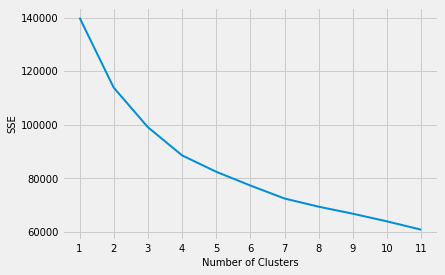

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), sse, linewidth=2)
plt.xticks(range(1, 12), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Number of Clusters", fontsize = 10)
plt.ylabel("SSE", fontsize = 10)
plt.show()

##### Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [36]:
kl = KneeLocator(range(1, 12), sse, curve="convex", direction="decreasing")

In [37]:
kl.elbow

4

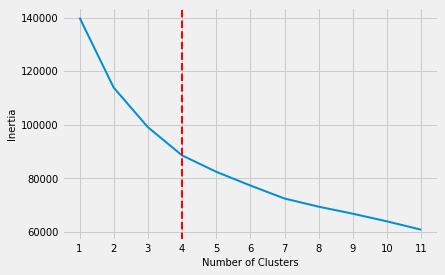

In [38]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 12), sse, linewidth=2)
plt.xticks(range(1, 12), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Inertia', fontsize = 10)

# Vertical line:
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--', linewidth=2)
plt.show()

##### The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster
##### Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

##### Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [39]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

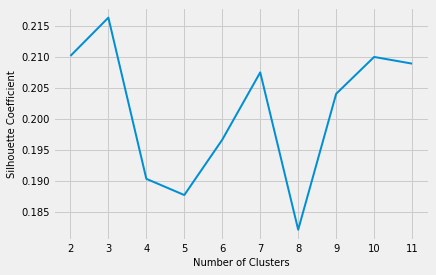

In [40]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients, linewidth=2)
plt.xticks(range(2, 12), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Number of Clusters", fontsize = 10)
plt.ylabel("Silhouette Coefficient", fontsize = 10)
plt.show()

In [41]:
#let's try silhouette_score for k=4,3,2

# Instantiate the KMeans for 4 clusters
km = KMeans(n_clusters=4, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score for n_clusters=4 : %.3f' % score)

Silhouetter Average Score for n_clusters=4 : 0.190


In [42]:
#let's try silhouette_score for k=4,3,2

# Instantiate the KMeans for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score for n_clusters=3 : %.3f' % score)

Silhouetter Average Score for n_clusters=3 : 0.217


In [43]:
#let's try silhouette_score for k=4,3,2

# Instantiate the KMeans for 2 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score n_clusters=2 : %.3f' % score)

Silhouetter Average Score n_clusters=2 : 0.210


For n_clusters = 2 The average silhouette_score is : 0.21017606527765656
For n_clusters = 3 The average silhouette_score is : 0.2173435034373733
For n_clusters = 4 The average silhouette_score is : 0.19009925111281226
For n_clusters = 5 The average silhouette_score is : 0.1876814162212408
For n_clusters = 6 The average silhouette_score is : 0.19662929674212257
For n_clusters = 7 The average silhouette_score is : 0.20792060877965104
For n_clusters = 8 The average silhouette_score is : 0.19445920263362548
For n_clusters = 9 The average silhouette_score is : 0.19666259942191416
For n_clusters = 10 The average silhouette_score is : 0.19287158601292553


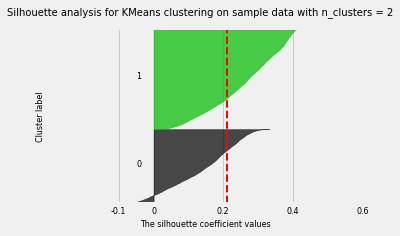

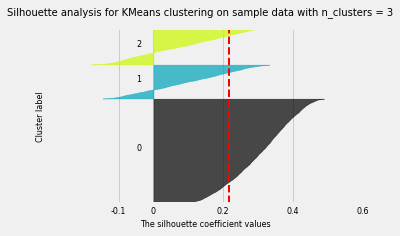

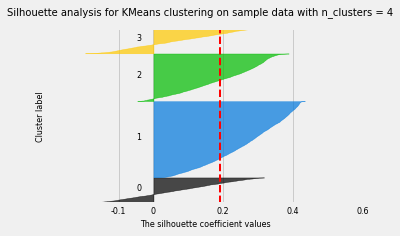

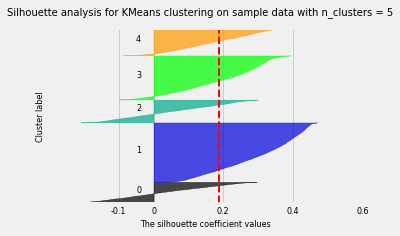

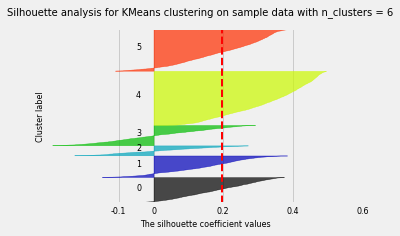

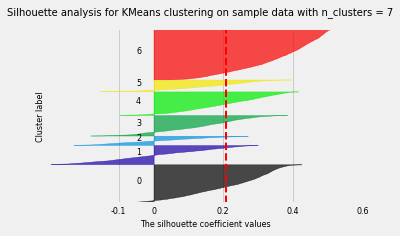

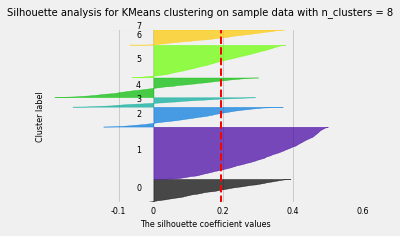

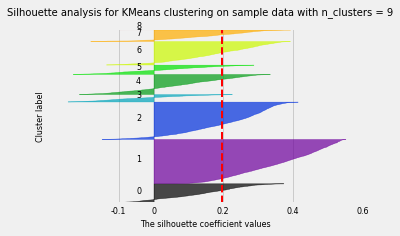

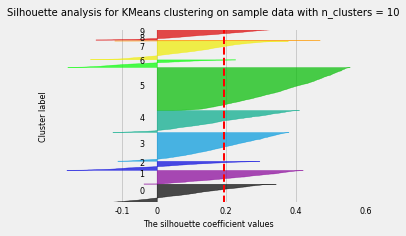

In [44]:
# Lets calculate the score for different number of cluster and plot the silhouette plot for the various clusters.

## These two libraries will be used here:
## from sklearn.metrics import silhouette_samples, silhouette_score
## import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

for n_clusters in range_n_clusters:
    #Create a subplot 
    fig, ax1 = plt.subplots()
    #ax1 = ax1.flatten()
    fig.set_size_inches(5, 3)

    
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 0.6])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters,
    # to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color,
            alpha=0.7)
        

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=8)
        

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values", fontsize=8)
    ax1.set_ylabel("Cluster label", fontsize=8)
    


    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)
   

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_yticklabels([], fontsize=8)
   
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6]) # labelsize=5, fontsize=5
    ax1.set_xticklabels([-0.1, 0, 0.2, 0.4, 0.6], fontsize=8)
    
    
    plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=10)
    #fontweight="bold")
    


plt.show() 

In [45]:
## This library will be used here:
## from sklearn.metrics import pairwise_distances

In [46]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(scaled_features)
labels = kmeans_model.labels_
metrics.silhouette_score(scaled_features, labels, metric='euclidean')

0.21637297056061847

In [47]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(scaled_features)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(scaled_features, labels)

1697.3378922362494

In [48]:
## This library will be used here:
## from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=1).fit(scaled_features)
labels = kmeans.labels_
davies_bouldin_score(scaled_features, labels)

1.640614664538786

In [49]:
# Calculating other metrics and plot them:

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
silhouette_coefficients = []
calinski_harabasz_score = []
davies_bouldin_score = []


for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(scaled_features) # unpacking operator (**)
    inertia = kmeans.inertia_
    labels = kmeans.labels_
    s_score = metrics.silhouette_score(scaled_features, labels, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(scaled_features, labels)
    db_score = metrics.davies_bouldin_score(scaled_features, labels)
    sse.append(inertia)
    silhouette_coefficients.append(s_score)
    calinski_harabasz_score.append(ch_score)
    davies_bouldin_score.append(db_score)

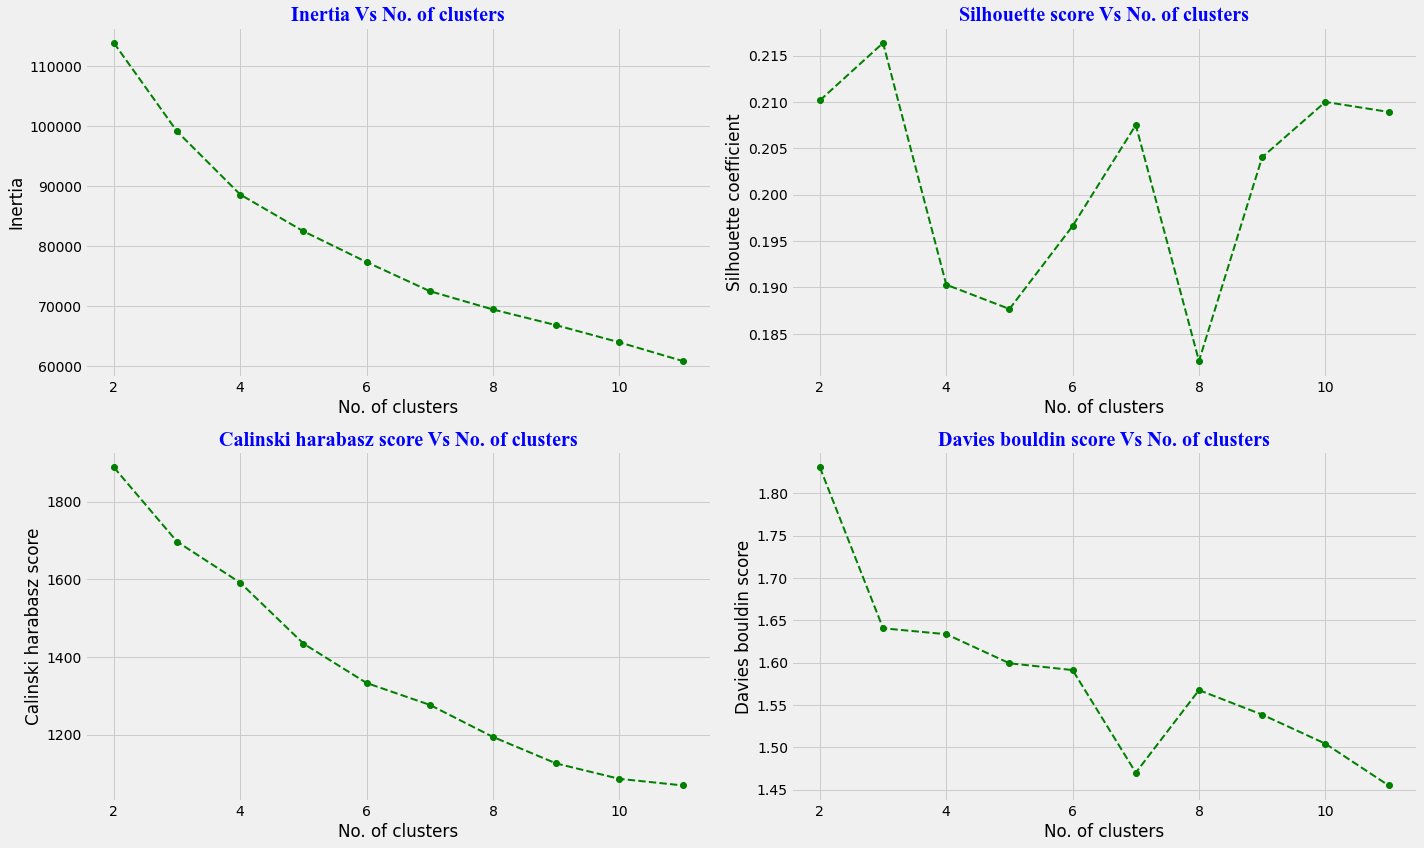

In [50]:
figure, axis = plt.subplots(2, 2, figsize=(20, 12))
  
# For Inertia
axis[0, 0].plot(range(2,12), sse, 'go--', linewidth=2)
axis[0, 0].set_title("Inertia Vs No. of clusters", fontweight="bold", fontname="Times New Roman", color = 'blue')
axis[0, 0].set_xlabel('No. of clusters')
axis[0, 0].set_ylabel('Inertia')
  
# silhouette_coefficients
axis[0, 1].plot(range(2,12), silhouette_coefficients, 'go--', linewidth=2)
axis[0, 1].set_title("Silhouette score Vs No. of clusters", fontweight="bold", fontname="Times New Roman", color = 'blue')
axis[0, 1].set_xlabel('No. of clusters')
axis[0, 1].set_ylabel('Silhouette coefficient')
  
# calinski_harabasz_score 
axis[1, 0].plot(range(2,12), calinski_harabasz_score, 'go--', linewidth=2)
axis[1, 0].set_title("Calinski harabasz score Vs No. of clusters", fontweight="bold", fontname="Times New Roman", color = 'blue')
axis[1, 0].set_xlabel('No. of clusters')
axis[1, 0].set_ylabel('Calinski harabasz score')
  
# davies_bouldin_score
axis[1, 1].plot(range(2,12), davies_bouldin_score, 'go--', linewidth=2)
axis[1, 1].set_title("Davies bouldin score Vs No. of clusters", fontweight="bold", fontname="Times New Roman", color = 'blue')
axis[1, 1].set_xlabel('No. of clusters')
axis[1, 1].set_ylabel('Davies bouldin score')

# Combine all the operations and display
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.tight_layout()
plt.show()

# Coclusion:

### According to the above plots and colculations, the cluster number 2 is selected.